## 02 HW

Используем набор примеров fashion-MNIST

1. Опишите - какой результата получен в нейросети в зависимости от:
числа нейронов в слое(для 2-хслойной сети),
числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
фиксируйте для тренировочного и тестового набора метрики accuracy.
2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
print('Train shape', train_images.shape)
print('Test shape', test_images.shape)

Train shape (60000, 28, 28)
Test shape (10000, 28, 28)


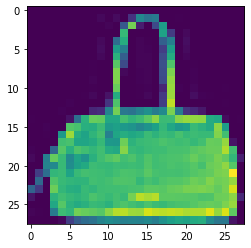

8


In [4]:
n = 2510
plt.imshow(train_images[n,:,:])
plt.show()
print(train_labels[n])

In [5]:
# Нормализация
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1
# Сглаживание
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [6]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

### 1. Опишите - какой результата получен в нейросети в зависимости от: числа нейронов в слое(для 2-хслойной сети), числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров). фиксируйте для тренировочного и тестового набора метрики accuracy.

In [7]:
n = [10, 50, 100, 150, 200, 250, 300]

for i in n:
    
  model = Sequential(name='my_model')
  model.add(Dense(128, activation='relu', input_shape=(784,)))  
  model.add(Dense(i, activation='tanh')) 
  model.add(Dense(10, activation='softmax'))

  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

  model.compile(
    optimizer='adam', # оптимизатор
    loss='categorical_crossentropy', # функция потерь
    metrics=['accuracy'], # метрика
  ) 


  # Обучаем сеть

  hh = model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=15,
    batch_size=32, 
    validation_split=0.2,
    verbose=0
  )

  # Оцениваем качество

  test_loss, test_accuracy = model.evaluate(test_images, y_tt, verbose=0)

  print(f'Количество нейронов {i}: Train - {hh.history.get("accuracy")[-1]:.3f}; Test - {test_accuracy:.3f}')

Количество нейронов 10: Train - 0.912; Test - 0.871
Количество нейронов 50: Train - 0.919; Test - 0.875
Количество нейронов 100: Train - 0.922; Test - 0.883
Количество нейронов 150: Train - 0.925; Test - 0.873
Количество нейронов 200: Train - 0.928; Test - 0.874
Количество нейронов 250: Train - 0.930; Test - 0.884
Количество нейронов 300: Train - 0.931; Test - 0.879


Количество нейронов на внутреннем слое двухслойной модели для данной задачи оптимально около 100

In [8]:
def train_evaluate_model(model, epochs=15, batch_size=32, optimizer='adam'):
  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

  model.compile(
    optimizer=optimizer, # оптимизатор
    loss='categorical_crossentropy', # функция потерь
    metrics=['accuracy'], # метрика
  ) 
    
  hh = model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=epochs,
    batch_size=32, 
    validation_split=0.2,
    verbose=0
  )

  test_loss, test_acc = model.evaluate(test_images, y_tt, verbose=0)

  return hh.history.get("accuracy")[-1], test_acc

In [9]:
model_2layers = Sequential(name='2_Layer_model')
model_2layers.add(Dense(128, activation='relu', input_shape=(784,)))  
model_2layers.add(Dense(190, activation='tanh')) 
model_2layers.add(Dense(10, activation='softmax'))
print(f'Количество параметров 2 слоя: {model_2layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_2layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 2 слоя: 126900
Train - 0.927; Test - 0.872


In [10]:
model_3layers = Sequential(name='3_Layer_model')
model_3layers.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(2):
  model_3layers.add(Dense(10+(10-k)*10, activation='tanh')) 

model_3layers.add(Dense(10, activation='softmax')) 
print(f'Количество параметров 3 слоя: {model_3layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_3layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 3 слоя: 126780
Train - 0.922; Test - 0.873


In [11]:
model_5layers = Sequential(name='5_Layer_model')
model_5layers.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(4):
  model_5layers.add(Dense(10+(7-k)*10, activation='tanh')) 

model_5layers.add(Dense(10, activation='softmax')) 
print(f'Количество параметров 5 слоев: {model_5layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_5layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 5 слоев: 124290
Train - 0.911; Test - 0.872


In [12]:
model_10layers = Sequential(name='10_Layer_model')
model_10layers.add(Dense(128, activation='relu', input_shape=(784,)))  

for k in range(3):
  model_10layers.add(Dense(10+(k+7)*10, activation='tanh')) 

model_10layers.add(Dense(10, activation='softmax')) 
print(f'Количество параметров 10 слоев: {model_10layers.count_params()}')

train_accuracy, test_accuracy = train_evaluate_model(model_10layers)

print(f'Train - {train_accuracy:.3f}; Test - {test_accuracy:.3f}')

Количество параметров 10 слоев: 128200
Train - 0.916; Test - 0.874


Лучшие результаты на тесте показала 10-слойная модель. Меньше всего переобучение на 5-слойной модели.

### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

Оптимизатор - SGD: Train - 0.904; Test - 0.873.
Оптимизатор - RMSProp: Train - 0.916; Test - 0.880.
Оптимизатор - adam: Train - 0.930; Test - 0.884.
Оптимизатор - NAdam: Train - 0.932; Test - 0.875.


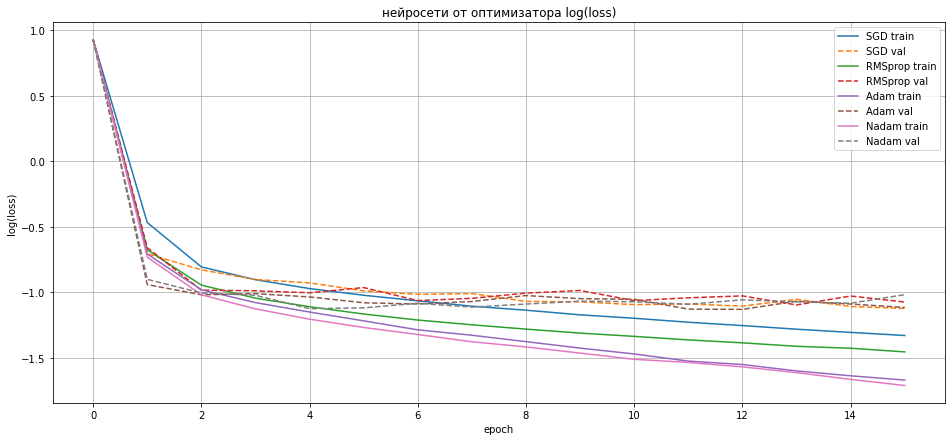

In [14]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(200, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

model.save_weights('model.h5')
plt.figure(figsize=(16,7))
epochs = 15
epoch = np.arange(epochs+1)

for optim in ['SGD','RMSProp','adam','NAdam']:

  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(784,)))  
  model.add(Dense(200, activation='tanh')) 
  model.add(Dense(10, activation='softmax'))

  model.load_weights('model.h5')
  
  model.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  hh0_tr = model.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = model.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  
  # проводим обучение модели 
  hh = model.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, 
                  validation_split=0.2, 
                  verbose = 0
                  )
  
  test_loss, test_acc = model.evaluate(test_images, y_tt, verbose=0)
  print(f'Оптимизатор - {optim}: '
        f'Train - {hh.history.get("accuracy")[-1]:.3f}; '
        f'Test - {test_acc:.3f}.')

  # картинки
  plt.plot(epoch, np.log([hh0_tr[0]]+hh.history['loss']),'-',label = model.optimizer.get_config()['name']+' train')
  plt.plot(epoch, np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = model.optimizer.get_config()['name']+' val')

plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Наилучшая метрика на тесте достигается при использовании оптимизатора adam. Хуже всего показал RMSProp.

На валидационном датасете ошибка модели мало отличается при использовании разных оптимизаторов.

### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Улучшить качество классификации на тестовом датасете помогло прменение оптимизатора Adam, и установка количества нейронов в 2-слойной модели около 100. Увеличение слоев модели до 10 (сократилось переобучение).

### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  
model.add(Dense(50, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

train_evaluate_model(model, optimizer='adam')

y_pred = model.predict(test_images[:,:])
y_pred_class = np.argmax(y_pred, axis=1)

confusion_matrix(test_labels, y_pred_class)

array([[871,   1,  18,  20,   2,   1,  80,   0,   7,   0],
       [  3, 962,   1,  28,   1,   0,   3,   0,   2,   0],
       [ 19,   2, 834,  20,  55,   0,  68,   0,   2,   0],
       [ 36,   6,   9, 898,  27,   0,  21,   0,   3,   0],
       [  3,   1, 136,  43, 754,   0,  62,   0,   1,   0],
       [  1,   0,   0,   2,   0, 963,   0,  10,   1,  23],
       [156,   2,  90,  24,  54,   0, 664,   0,  10,   0],
       [  1,   0,   0,   0,   0,  64,   0, 889,   0,  46],
       [  6,   0,   5,   9,   4,   4,   9,   1, 962,   0],
       [  0,   0,   0,   0,   0,   8,   1,  21,   0, 970]], dtype=int64)

In [18]:
recall_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.871, 0.962, 0.834, 0.898, 0.754, 0.963, 0.664, 0.889, 0.962,
       0.97 ])

In [19]:
precision_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.79470803, 0.98767967, 0.76303751, 0.86015326, 0.84057971,
       0.92596154, 0.73127753, 0.96525516, 0.97368421, 0.93358999])

In [20]:
f1_score(test_labels, y_pred_class, labels=np.unique(test_labels), average=None)

array([0.83110687, 0.97467072, 0.79694219, 0.87866928, 0.79493938,
       0.94411765, 0.69601677, 0.9255596 , 0.96780684, 0.95144679])

Получились хорошие значения метрик precision и recall, для одного из классов f1_score получилась низкой = 0.696